Creating a WordCloud Class

In [1]:
# load libraries
import numpy as np
import pandas as pd
import os
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
# Mount personal Google Drive to access data
os.chdir("/content/drive/MyDrive/Colab Notebooks/WordCloud")
!ls

'Copy of Creating a Word Cloud with Python.ipynb'
 Coronavirus-CDC.jpg
'Coronavirus Review.pdf'
'Creating a Word Cloud Class with Python.ipynb'
'Creating a Word Cloud using Functions with Python.ipynb'
'Creating a Word Cloud with Python.ipynb'
 virus_wordcloud2.png
 virus_wordcloud.png


In [3]:
!pip install PyMuPDF

     |████████████████████████████████| 6.3MB 3.9MB/s 


In [4]:
# import PyMuPDF module "fitz"
import fitz

<h3>WordCloud Functions</h3>

In [46]:
def load_text(filename, format):
  '''Load text from file. Provide filename and file format'''
  if format == 'pdf':
    with fitz.open(filename) as f:
      text = ""
      for page in f:
        text += page.getText()
  elif format == 'excel':
    text = pd.read_excel(filename)
  elif format == 'txt':
    text = pd.read_table(filename)
  else:
    raise ValueError("Invalid file format. Please specify excel, txt, or pdf")
  return text

def use_stopwords():
  '''Create stopword list'''
  stop_words = set(STOPWORDS)
  return stop_words
  
def update_stopwords(update_list):
  '''Update list of stopwords'''
  stop_words = stop_words.update(update_list)
  return stop_words

def create_mask(filename):
  '''Open file to use as a mask'''
  mask = np.array(Image.open(filename))
  return mask
  
def transform_mask(mask):
  '''Transform mask into a new one with one that will work with the wordcloud function.'''
  transformed_mask = np.ndarray((mask.shape[0], mask.shape[1]), np.int32)
  for i in range(len(mask)):
    transformed_mask[i] = list(map(transform_format, mask[i]))
    return transformed_mask

def generate_wordcloud(stopwords=None, background_color="white", mask=None, max_words=200, mode="RGB", contour_width=0, contour_color="black"):
  '''Generate wordcloud'''
  wordcloud = WordCloud(stopwords=stopwords, background_color=background_color, mask=mask, max_words=max_words, mode=mode,  contour_width=contour_width, contour_color=contour_color).generate(text)
  return wordcloud

def show_wordcloud(wordcloud, figsize):
  '''Display word cloud with default colors'''
  plt.figure(figsize=figsize)
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()
  
def show_wordcloud_pattern(wordcloud, figsize):
  '''Display and save word cloud with colouring from mask image'''
  image_colors = ImageColorGenerator(mask)
  
  plt.figure(figsize=figsize)
  plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation='bilinear')
  plt.axis("off")
  plt.show()

def save_wc(wordcloud, filename):
  wordcloud.to_file(filename=filename)

def transform_format(val):
  '''Transform values of mask image. Transform pixels to value 255 if white and to value 0 for black.'''
  if val == 0:
    return 255
  else:
    return val

In [9]:
text = load_text("Coronavirus Review.pdf", 'pdf')

In [ ]:
#print(text)

In [10]:
stopwords = use_stopwords()

In [11]:
stopwords.update(["et", "al", "Journal", "Epub", "print"])

In [12]:
mask = create_mask("Coronavirus-CDC.jpg")

(-0.5, 767.5, 431.5, -0.5)

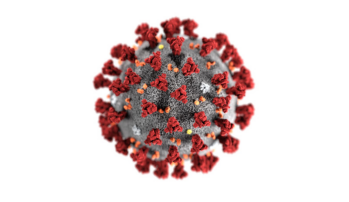

In [13]:
plt.imshow(mask)
plt.axis("off")

In [34]:
wordcloud_virus = generate_wordcloud(stopwords=stopwords, background_color="white", mask=mask)

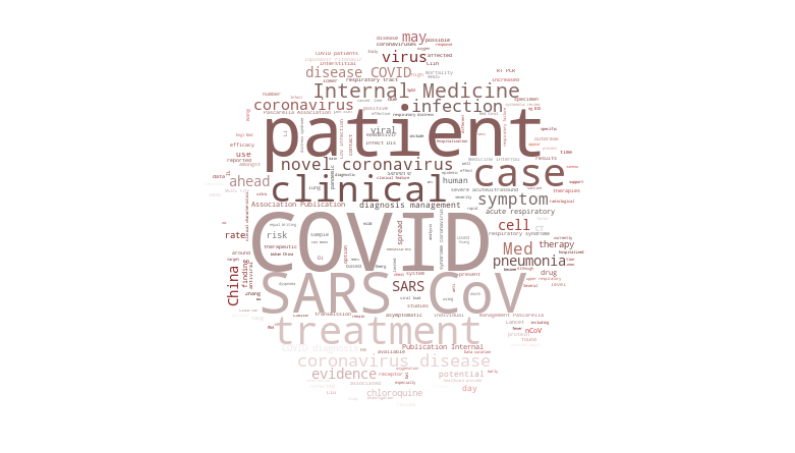

In [35]:
show_wordcloud_pattern(wordcloud_virus, [14,14])

In [48]:
save_wc(wordcloud_virus, "virus_wordcloud2.png")